# Linear Regression Single Neuron Model

In this notebook, we implement the single neuron model together with the gradient descent algorithm in order to solve the linear regression problem. We will focus on linear regression in the CVDs dataset.

---

## Introduction

Let $\mathcal{X}$ be the space of all possible feature vectors, let $\mathcal{Y}$ be the space of all possible corresponding labels for the feature vectors, and let $f:\mathcal{X} \rightarrow \mathcal{Y}$ be the optimal target function assigning labels to feature vectors in $\mathcal{Y}$. 

In [regression](https://en.wikipedia.org/wiki/Regression_analysis), machine learning models are given labeled data $\mathcal{D} = \{(\mathbf{x}^1, y^1), \dots, (\mathbf{x}^N, y^N)\}$, where the feature vectors satisfy $\mathbf{x}^{(i)} \in \mathbb{R}$ and the target labels satify $y^{(i)} \in \mathbb{R}$. Thus, this supervised learning task seeks to predict real valued target labels.

In this notebook we will focus on **linear regression**. This specific case of regression assumes that the *target values in $\mathcal{Y}$ are approximated by a linear function of the associated feature vectors*. That is, the optimal target function $f:\mathcal{X} \rightarrow \mathcal{Y}$ is assumed the be roughly a linear function. 

---

## Algorithm

In a generalized supervise machine learning model, the optimal target function $f:\mathcal{X} \rightarrow \mathcal{Y}$ assigns the correct labels to every possible feature measurement. Next recall that our goal is to find a reasonable hypthesis $h:\mathcal{X} \rightarrow \mathcal{Y}$, which approximates the target function $f$. 

Because we are assuming the target function $f:\mathcal{X} \rightarrow \mathcal{Y}$ is a **linear function of the input features**, and because we know single neuron models are good function approximators, we next build a single neuron model with a *linear-activation* activation function. Furthermore, in this model we choose the *mean-sqaured error* cost function:

$$
C(\mathbf{w}, b) = \frac{1}{2N}\sum_{i=1}^{N}\Big(\hat{y}^{(i)} - y^{(i)}\Big)^2. 
$$

### Gradient Descent

Before defining a custom ```SingleNeuron``` class, we first need first discuss how to minimize the neurons cost function. More specifically, we wish to solve the following optimization problem:

$$
\min_{w_1, b}C(w_1, b)
$$

Since $C(w_1, b)$ is a differentiable function of both $w_1$ and $b$, we may attempt to solve this minimization problem by applying the gradient descent algorithm:

$$
w_1 \leftarrow w_1 - \alpha \frac{\partial C}{\partial w_1}
$$

$$
b \leftarrow b - \alpha \frac{\partial C}{\partial b}
$$

#### Batch Gradient Descent 

When considering a single instance of data, we easily calculated $\frac{\partial C}{\partial w_1}$ and $\frac{\partial C}{\partial b}$ by applying the chain-rule. This notion can now be extended to all data used in training by summing the gradients calculated at entry of data. We will refer to this process as calculating the **full gradient** (or **full partial derivatives**) with respect to the training data: 

1. $\frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial w_1} = \frac{1}{N}\sum_{i=1}^{N}\Big(\hat{y}^{(i)} - y^{(i)}\Big)x^{(i)}$
2. $\frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial b} = \frac{1}{N}\sum_{i=1}^{N}\Big(\hat{y}^{(i)} - y^{(i)}\Big)$

Calculating the full gradient with respect to all training data and applying the gradient descent algorithm is called **batch gradient descent**.

**Batch Gradient Descent Algorithm:**
1. For each epoch **do**
2. Calculate the full gradient by finding $\frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial w_1}$ and $\frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial b}$.
3. $w \leftarrow w - \alpha \frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial w_1}$
4. $b \leftarrow b - \alpha \frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial b}$

#### Stochasitc Gradient Descent

Applying batch gradient descent will work. However, *this method can be very slow and use a lot of memory*, especially when the number of training data is very large (possibly millions). More importantly, **batch gradient descent is not necessary to find local minima**. 

The most common way work around for this problem is to update $w_1$ and $b$ by calculating the gradient with respect to one entry of data at a time. This technique is called **stochastic gradient descent** and is one of the primary tools in training deep neural networks and simple single neuron models.  

**Stochastic Gradient Descent Algorithm:**
1. For each epoch **do**
2. For $i = 1, \dots, N$ **do**
3. Calculate $\frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial w_1}$ and $\frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial b}$.
2. $w \leftarrow w - \alpha \frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial w_1}$
3. $b \leftarrow b - \alpha \frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial b}$

For single neuron models in practice, stochastic gradient descent should be the preferred way for optimizing the weights and bias by minimizing the cost function. We implement stochastic gradient descent with the ```train``` method used in the ```SingleNeuron``` class defined in [Modules.single_neuron.py](https://github.com/YulinLi98/Sample_Repo/blob/main/Supervised_Leanring/Modules/single_neuron.py).

```python
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    
    plot_cost_function(self)
        Visualizes the cost after each epoch during training.

    plot_decision_boundary(self, X, y, xstring="x", ystring="y")
        Plot the decision region of single neuron model.
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        return fig

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()
```

---

## Coding


In [1]:
import sys 
sys.path.append('..')

# Import SingleNeuron Class
from Modules.single_neuron import SingleNeuron

# Define linear activation function
def linear_activation(z):
    return z

# Define MSE cost function
def mean_sqaured_error(y_hat, y):
    return .5*(y_hat - y)**2

In [2]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("https://raw.githubusercontent.com/YulinLi98/Sample_Repo/main/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


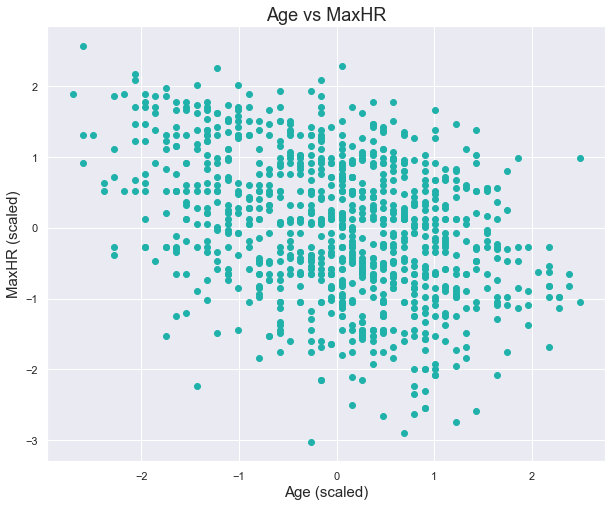

In [3]:
# Check the relationship between Age and MaxHR
from sklearn import preprocessing

# Data Formating
X = df.Age.values
X = X.reshape(-1, 1)
y = df.MaxHR.values

# Standardize the data
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

# Visualization
plt.figure(figsize = (10, 8))
plt.scatter(X_scaled, 
            y_scaled, 
            color = "lightseagreen")
plt.xlabel("Age (scaled)", fontsize = 15)
plt.ylabel("MaxHR (scaled)", fontsize = 15)
plt.title("Age vs MaxHR", fontsize = 18)
plt.show()

intercept = 0.3671653661848043, slope = -0.3098023810719734


Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

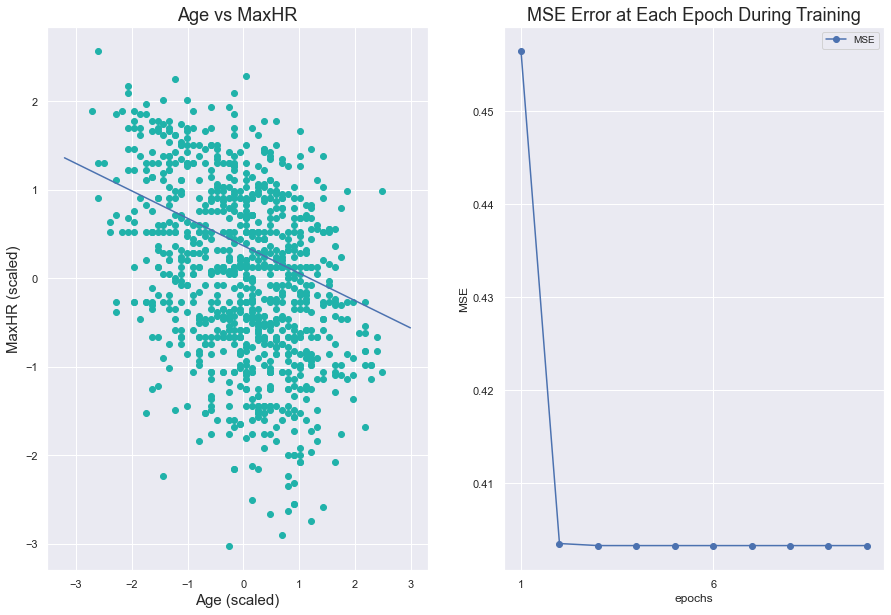

In [8]:
# Create and train an instance of the SingleNeuron Class
node = SingleNeuron(linear_activation, mean_sqaured_error)
node.train(X_scaled, y_scaled, epochs=10)

# Output the intercept and slope
print(f'intercept = {node.w_[1]}, slope = {node.w_[0]}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

# Visualize the regression line
domain = np.linspace(np.min(X_scaled) - .5, np.max(X_scaled) + .5, 100)
ax1.scatter(X_scaled, y_scaled, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("Age (scaled)", fontsize = 15)
ax1.set_ylabel("MaxHR (scaled)", fontsize = 15)
ax1.set_title("Age vs MaxHR", fontsize = 18)

# visualize the mean-sqaured error at each epoch
ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

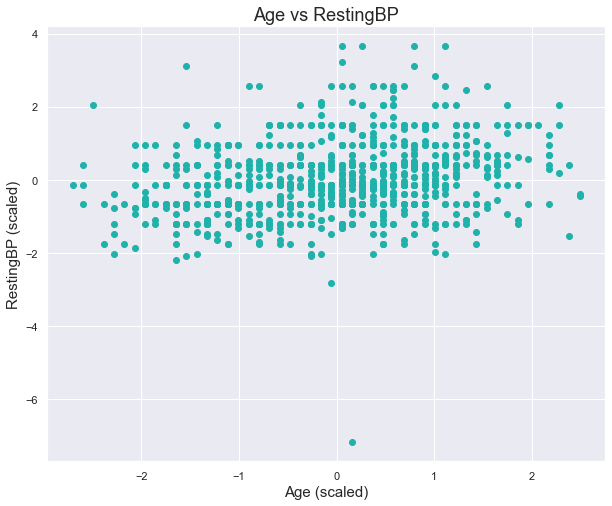

In [26]:
# Check the relationship between Age and RestingBP
X = df.Age.values
X = X.reshape(-1, 1)
y = df.RestingBP.values

# Standardize the data
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

# Visualization
plt.figure(figsize = (10, 8))
plt.scatter(X_scaled, 
            y_scaled, 
            color = "lightseagreen")
plt.xlabel("Age (scaled)", fontsize = 15)
plt.ylabel("RestingBP (scaled)", fontsize = 15)
plt.title("Age vs RestingBP", fontsize = 18)
plt.show()

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

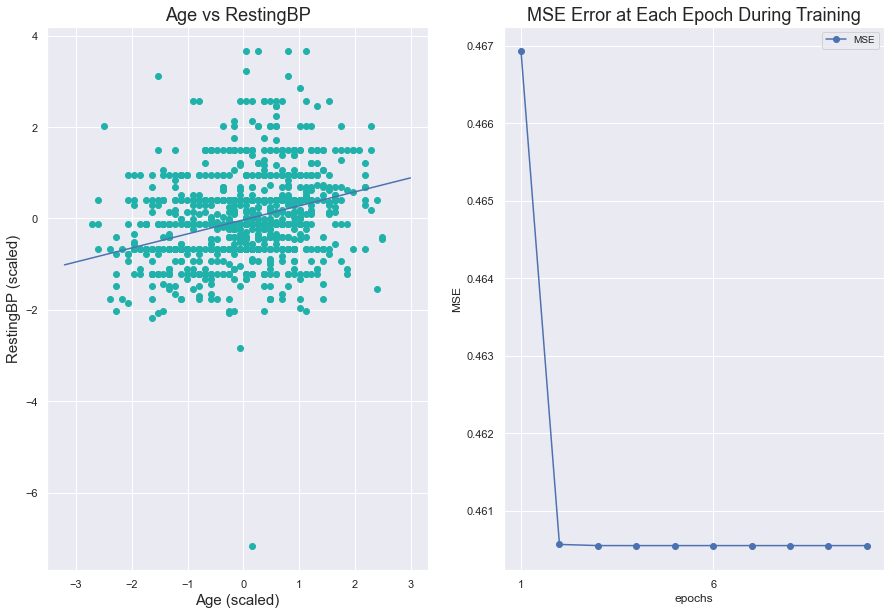

In [27]:
# Create and train an instance of the SingleNeuron Class
node2 = SingleNeuron(linear_activation, mean_sqaured_error)
node2.train(X_scaled, y_scaled, epochs=10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

# Visualize the regression line
domain = np.linspace(np.min(X_scaled) - .5, np.max(X_scaled) + .5, 100)
ax1.scatter(X_scaled, y_scaled, color = "lightseagreen")
ax1.plot(domain, node2.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("Age (scaled)", fontsize = 15)
ax1.set_ylabel("RestingBP (scaled)", fontsize = 15)
ax1.set_title("Age vs RestingBP", fontsize = 18)

# visualize the mean-sqaured error at each epoch
ax2.plot(range(1, len(node2.errors_) + 1), 
         node2.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node2.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

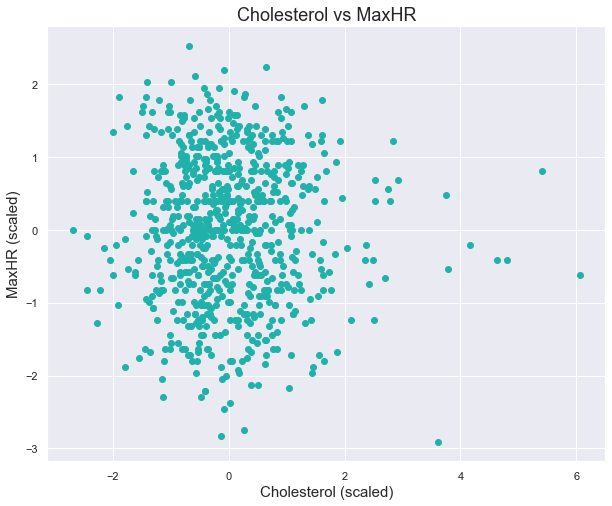

In [28]:
# Check the relationship between Cholesterol and MaxHR
X = df[df.Cholesterol > 0].Cholesterol.values
X = X.reshape(-1, 1)
y = df[df.Cholesterol > 0].MaxHR.values

# Standardize the data
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

# Visualization
plt.figure(figsize = (10, 8))
plt.scatter(X_scaled, 
            y_scaled, 
            color = "lightseagreen")
plt.xlabel("Cholesterol (scaled)", fontsize = 15)
plt.ylabel("MaxHR (scaled)", fontsize = 15)
plt.title("Cholesterol vs MaxHR", fontsize = 18)
plt.show()

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

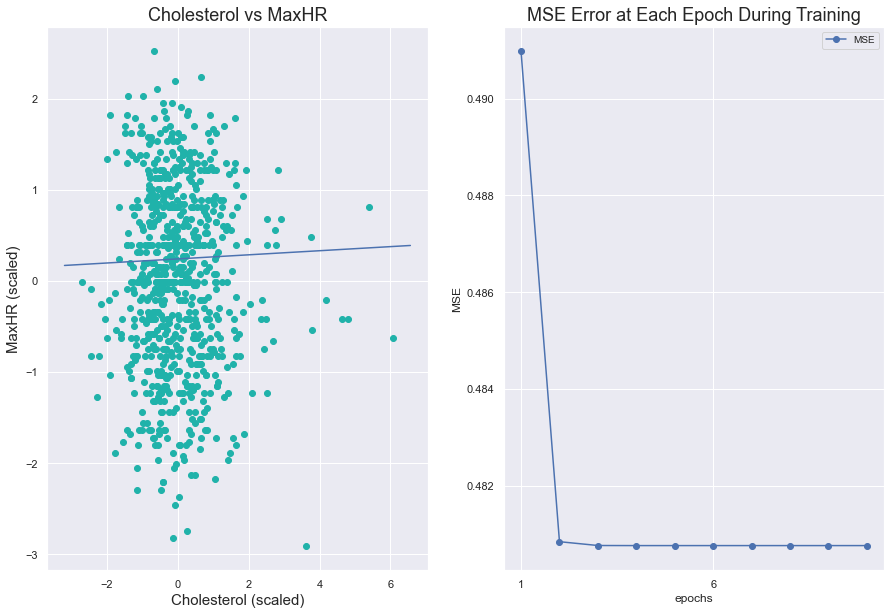

In [29]:
# Create and train an instance of the SingleNeuron Class
node3 = SingleNeuron(linear_activation, mean_sqaured_error)
node3.train(X_scaled, y_scaled, epochs=10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

# Visualize the regression line
domain = np.linspace(np.min(X_scaled) - .5, np.max(X_scaled) + .5, 100)
ax1.scatter(X_scaled, y_scaled, color = "lightseagreen")
ax1.plot(domain, node3.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("Cholesterol (scaled)", fontsize = 15)
ax1.set_ylabel("MaxHR (scaled)", fontsize = 15)
ax1.set_title("Cholesterol vs MaxHR", fontsize = 18)

# visualize the mean-sqaured error at each epoch
ax2.plot(range(1, len(node3.errors_) + 1), 
         node3.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node3.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

C:\Users\lyl98\AppData\Local\Temp/ipykernel_85564/579711534.py:13: RuntimeWarning: overflow encountered in double_scalars
  return .5*(y_hat - y)**2
e:\Rice\Canvas\2022 Spring\INDE 577\INDE_577_Repo\Supervised_Learning\Linear_Regression\..\Modules\single_neuron.py:55: RuntimeWarning: overflow encountered in double_scalars
  self.w_[-1] -= alpha*(self.predict(xi) - target)
e:\Rice\Canvas\2022 Spring\INDE 577\INDE_577_Repo\Supervised_Learning\Linear_Regression\..\Modules\single_neuron.py:62: RuntimeWarning: invalid value encountered in double_scalars
  preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]


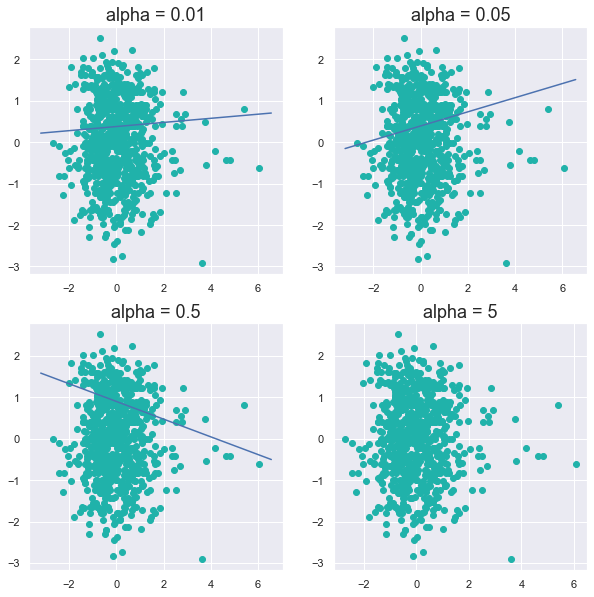

In [30]:
# Experiment with different learning rate
alphas = [0.01, 0.05,  0.5, 5]

domain = np.linspace(np.min(X_scaled) - .5, np.max(X_scaled) + .5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation, mean_sqaured_error)
    node.train(X_scaled, y_scaled, epochs=10, alpha = alpha)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X_scaled, y_scaled, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)

### Perfrom Linear Regression using Scikit-Learn


In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_scaled)
lin_reg.intercept_, lin_reg.coef_

(4.539684981321273e-16, array([-0.38204468]))

## Conclusion

The linear regression model does not fit well on the CVDs dataset. The reason is that there is no underlying linear relationship for the variables in linear models.